In [1]:
import scipy.io as sio
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
data = sio.loadmat('XwindowsDocData.mat')

In [2]:
xtrain = data['xtrain']; xtest = data['xtest']
ytrain = data['ytrain']; ytest = data['ytest']
vocab = data['vocab']

### Naive Bayes classifiers
- To classify vectors of discrete-valued features, $\mathbf{x}\in\{1,...,K\}^D$, where K is the number of values for each feature, and D is the number of features. A generative approach requires to specify the class conditional distribution, $p(\mathbf{x}|y=c)$. The simplest approach is to assume the features are conditionally independent given the class label. The class conditional density as a product of one dimensional densities: 

$$p(\mathbf{x}|y=c,\mathbf{\theta})= \prod^D_{j=1}p(x_j|y=c,\theta_{jc})$$

The resulting model is called a naive Bayes classifier (NBC) $\sim O(CD)$, for C classes and D features.

- In the case of **real-valued features**, the Gaussian distribution can be used. $p(\mathbf{x}|y=c,\theta)=\prod^D_{j=1}\mathcal{N}(x_j|\mu_{jc},\sigma^2_{jc})$, where $\mu_{jc}$ the mean of feature $j$ in objects of class $c$, and $\sigma^2_{jc}$ its variance.
- In the case of **binary features**, $x_j\in\{0,1\}$, the Bernoulli distribution $p(\mathbf{x}|y=c,\theta)=\prod^D_{j=1}Ber(x_j|\mu_{jc})$, where $\mu_{jc}$ the probability that feature $j$ occurs in class $c$. (**multivariate Bernoulli naive Bayes**)
- In the case of **categorical features**, $x_j\in\{1,...,K\}$, the multinoulli distribution is used, $p(\mathbf{x}|y=c,\theta)=\prod^D_{j=1}Cat(x_j|\mu_{jc})$, where $\mu_{jc}$ is a histogram over the K possible values for x_j in class c.

Train a naive Bayes classifier = computing the MLE or the MAP estimate for the parameters.

### MLE for NBC
The probability for a single data case is given by,

$$
p(\mathbf{x_i},y_i|\theta) = p(y_i|\pi)\prod_j p(x_{ij}|\theta_j) = \prod_c \pi_c^{\mathbb{I}(y_i=c)}\prod_j\prod_c p(x_{ij}|\theta_{jc})^{\mathbb{I}(y_i=c)}
$$

where $p(y_i|\pi)$ the likelihood over a class $c$, and $p(x_{ij}|\theta_j)$ the probability of feature $j$ in the text document $i$ over class $c$. 

\begin{align}
\log p(\mathcal{D}|\theta) &= \sum_i\log p(\mathbf{x}_i,y_i|\theta) = \sum_i\log\prod_c \pi_c^{\mathbb{I}(y_i=c)}\prod_j\prod_c p(x_{ij}|\theta_{jc})^{\mathbb{I}(y_i=c)} \\
&= \sum_i\sum^C_{c=1}\mathbb{I}(y_i=c)\log\pi_c+\sum_i\sum_{j=1}^D\sum^C_{c=1}\mathbb{I}(y_i=c)\log p(x_{ij}|\theta_{jc}) \\
\log p(\mathcal{D}|\theta) &= \sum^C_{c=1}N_c\log\pi_c + \sum_{j=1}^D\sum^C_{c=1}\sum_{i:y_i=c}\log p(x_{ij}|\theta_{jc})
\end{align}

where $N_c\triangleq\sum_i\mathbb{I}(y_i=c)$ is the number of examples in class c.

To enforce the constraints that $\sum_c\pi_c = 1$, a **Lagrange multiplier** is used. The **constrained objective function (Lagrangian)** is given by the **log likelihood** + the **constraint**: 

$$\mathcal{l}(\theta,\lambda) = \sum^C_{c=1}N_c\log\pi_c + \sum_{j=1}^D\sum^C_{c=1}\sum_{i:y_i=c}\log p(x_{ij}|\theta_{jc})+\lambda(1-\sum_c\pi_c)$$

Taking derivatives with respect to $\lambda$ yields the original constraint $\sum_c\pi_c = 1$. 

Taking derivatives with respect to $\pi_c$ yields

\begin{align}
\frac{\partial \mathcal{l}}{\partial \pi_c} &= \frac{N_c}{\pi_c}-\lambda =0 \Longrightarrow N_c = \lambda\pi_c \\
\Longrightarrow \sum_c N_c &= \lambda\sum_c\pi_c \Longrightarrow
\lambda = \sum_c N_c = N
\end{align}
Therefore, $$\hat{\pi}_c = \frac{N_c}{\lambda}=\frac{N_c}{N}$$


### Classifying documents using bag of words
**Document classification** is the problem of classifying text documents into different categories. One simple approach is to represent each document as a binary vector, which records whether each word is present or not, so $x_{ij}=1$ iff (if or only if) word $j$ occurs in document $i$, otherwise $x_{ij}=0$.
Suppose all features are binary (sparse matrix), so $x_i|y = c \sim Ber(\theta_{jc})$ and $p(x_{ij}|\theta_{jc}) = Ber(x_{ij}|\theta_{jc}) = \theta_{jc}^{\mathbb{I}(x_{ij})}(1-\theta_{jc})^{\mathbb{I}(1-x_{ij})}$.

Class conditional density:
$$p(\mathbf{x}_i|y_i=c,\theta)=\prod^D_{j=1}Ber(x_{ij}|\theta_{jc})=\prod^D_{j=1}\theta_{jc}^{\mathbb{I}(x_{ij})}(1-\theta_{jc})^{\mathbb{I}(1-x_{ij})}$$

To enforce the constraints that $\sum_c\sum_j\theta_{jc} = 1$, a **Lagrange multiplier** is used. The **constrained objective function (Lagrangian)** is given by the **log likelihood** + the **constraint**: 

$$\mathcal{l}(\theta,\lambda) = \sum^C_{c=1}N_c\log\pi_c + \sum_{j=1}^D\sum^C_{c=1}\sum_{i:y_i=c}\log p(x_{ij}|\theta_{jc})+\lambda(1-\sum_j\sum_c\theta_{jc})$$

Therefore, $$\hat{\theta}_{jc}=\frac{N_{jc}}{N}$$.



### Fitting a naive Bayes classifier to binary features
$$\hat{\pi}_c= \frac{N_c}{N}\text{ , }\hat{\theta}_{jc}=\frac{N_{jc}}{N}$$

In [3]:
def naiveBayesFit(xtrain,ytrain):
    pC = 1
    c = np.unique(ytrain)
    Ntrain,D = xtrain.shape
    theta = np.zeros((len(c),D))
    Nclass = []
    for i in c:
        ndx = np.where(ytrain==i)[0]
        Xtr = xtrain[ndx,:]
        Non = np.sum(Xtr==1,axis=0)
        Noff = np.sum(Xtr==0,axis=0)
        theta[i-1,:] = (Non+pC)/(Non+Noff+2*pC)
        Nclass.append(len(ndx))
    classPrior = Nclass/np.sum(Nclass)
    return theta,classPrior

In [4]:
theta,classPrior = naiveBayesFit(xtrain,ytrain)

C:\Users\44754\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  """Entry point for launching an IPython kernel.
C:\Users\44754\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  """Entry point for launching an IPython kernel.


### Predicting with a naive bayes classifier for binary features

$$p(y=c|\mathbf{x},\mathcal{D})\propto p(y=c|\mathcal{D})\prod^D_{j=1}p(x_j|y=c,\mathcal{D})$$

The correct Bayesian procedure is to integrate out the unknwon parameters,

$$p(y=c|\mathbf{x},\mathcal{D})\propto\bigg[\int Cat(y=c|\pi)p(\pi|\mathcal{D})d\pi\bigg]\prod^D_{j=1}\int Ber(x_j|y=c,\theta_{jc})p(\theta_{jc}|\mathcal{D})$$

The posterior predictive density is given by,

\begin{align}
p(y=c|\mathbf{x},\mathcal{D})&\propto \bar{\pi}_c\prod^D_{j=1}\bar{\theta}_{jc}^{\mathbb{I}(x_j=1)}(1-\bar{\theta}_{jc})^{\mathbb{I}(x_j=0)} \\
\bar{\theta}_{jk} &= \frac{N_{jc}+\beta_1}{N_c+\beta_0+\beta_1} \\
\bar{\pi}_c &= \frac{N_c+\alpha_c}{N+\alpha_0}
\end{align}

To avoid numerical underflow, the log-sum-exp trick is also used. 

\begin{align}
p_{ic} &= \exp(L_{ic}-\log\sum\exp L_{i,:}) \\
\hat{y}_i &= \arg\max_c p_{ic}
\end{align}

In [5]:
def naiveBayesPredict(theta,classPrior,xtest):
    Ntest = xtest.shape[0]
    C = theta.shape[0]
    logPrior = np.log(classPrior)
    logPost = np.zeros((Ntest,C))
    #logPost = []
    logT = np.log(theta)
    logTnot = np.log(1-theta)
    xtestnot = csc_matrix((xtest.todense()==0)*1)

    xtesttmp = xtest.todense()
    xtestnottmp = xtestnot.todense()
    for i in np.array([1,2]):
        tmpT = np.tile(logT[i-1,:],(Ntest,1))
        tmpTnot = np.tile(logTnot[i-1,:],(Ntest,1))
        L1 = csc_matrix(np.multiply(tmpT,xtesttmp))
        L0 = csc_matrix(np.multiply(tmpTnot,xtestnottmp))
        logPost[:,i-1]=np.sum(L0+L1,axis=1).squeeze()
    yhat = np.argmax(logPost,axis=1)
    return yhat
def zeroOneLossFn(y,ypred):
    err = y!=ypred
    return err

In [6]:
ypred_train = naiveBayesPredict(theta,classPrior,xtrain)
err_train = np.mean(zeroOneLossFn(ytrain.squeeze(),ypred_train+1))
ypred_test = naiveBayesPredict(theta,classPrior,xtest)
err_test = np.mean(zeroOneLossFn(ytest.squeeze(),ypred_test+1))

In [7]:
print('Misclassification rate on train: '+str(err_train))
print('Misclassification rate on test: '+str(err_test))

Misclassification rate on train: 0.08333333333333333
Misclassification rate on test: 0.18666666666666668


<BarContainer object of 600 artists>

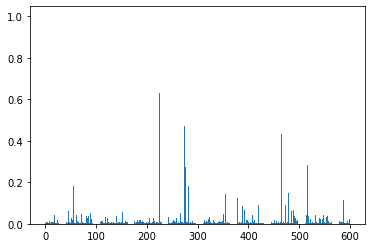

In [8]:
plt.bar(range(theta[0,:].shape[0]),theta[0,:])

<BarContainer object of 600 artists>

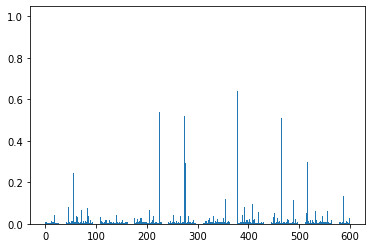

In [9]:
plt.bar(range(theta[1,:].shape[0]),theta[1,:])